In [43]:
#lAB ASSIGNMENT 2

#1
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine = load_wine()
X = wine.data
y = wine.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)
print("Number of samples in training",len(X_train))
print("Number of samples in testing",len(X_test))


Number of samples in training 142
Number of samples in testing 36


In [44]:
print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [45]:
#Normalization of Data

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [46]:
# Scaling of Datapoints

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [52]:
#2A 3A

#Tree Gini Model

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
StratkFold = StratifiedKFold(n_splits=10)
from sklearn.tree import DecisionTreeClassifier

best_score = 0
for maxd in [1,2,3,4,5,6,7]:
    
    tree_giniIndex = DecisionTreeClassifier(max_depth = maxd).fit(X_train, y_train)
    
    fold_accuracies = cross_val_score(tree_giniIndex, X_train, y_train,cv=StratkFold)    
    score = fold_accuracies.mean()
    # Find out the better score
    if score > best_score:
        best_score = score
        best_parameters = {'max_depth': maxd}
    
# Rebuild a model on the combined training and validation set,
# and evaluate a test score
tree_giniIndex = DecisionTreeClassifier(**best_parameters)
tree_giniIndex.fit(X_train, y_train)
test_score = tree_giniIndex.score(X_test,y_test)
    
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.89
Best parameters: {'max_depth': 7}
Test set score with best parameters: 0.89


In [55]:
#2A 3A

#Tree Entropy Model

best_score = 0
for maxd in [1,2,3,4,5,6,7]:
    
    tree_entropyIndex = DecisionTreeClassifier(criterion="entropy",max_depth = maxd).fit(X_train, y_train)
    
    fold_accuracies = cross_val_score(tree_entropyIndex, X_train, y_train,cv=StratkFold)    
    score = fold_accuracies.mean()
    
    if score > best_score:
        best_score = score
        best_parameters = {'max_depth': maxd}

# Rebuild a model on the combined training and validation set,
# and evaluate a test score
tree_entropyIndex = DecisionTreeClassifier(**best_parameters,criterion="entropy")
tree_entropyIndex.fit(X_train, y_train)  
test_score = tree_entropyIndex.score(X_test,y_test)
    
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.93
Best parameters: {'max_depth': 6}
Test set score with best parameters: 0.94


In [56]:
#2A 3A

###KNN Neighbor(Manhattan)
from sklearn.neighbors import KNeighborsClassifier
best_score = 0
for n_neighbors in [4,5,6,8,7,9,10]:
    
    clf = KNeighborsClassifier(n_neighbors = n_neighbors, p=1, metric='minkowski')
    clf.fit(X_train, y_train)
    
    fold_accuracies = cross_val_score(clf, X_train, y_train,cv=StratkFold)    
    score = fold_accuracies.mean()
    
    if score > best_score:
        best_score = score
        best_parameters = {'n_neighbors': n_neighbors}

# Rebuild a model on the combined training and validation set,
# and evaluate a test score
clf = KNeighborsClassifier(**best_parameters, p=1, metric='minkowski')
clf.fit(X_train_norm,y_train)
test_score = clf.score(X_test_norm,y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.76
Best parameters: {'n_neighbors': 6}
Test set score with best parameters: 0.94


In [57]:
#2A 3A

###KNN Neighbor(Euclidean)
from sklearn.neighbors import KNeighborsClassifier
best_score = 0
for n_neighbors in [4,5,7,8,9,6,10]:
    
    euc = KNeighborsClassifier(n_neighbors = n_neighbors, p=2, metric='minkowski')
    euc.fit(X_train, y_train)
    
    fold_accuracies = cross_val_score(clf, X_train, y_train,cv=StratkFold)    
    score = fold_accuracies.mean()
    
    if score > best_score:
        best_score = score
        best_parameters = {'n_neighbors': n_neighbors}

# Rebuild a model on the combined training and validation set,
# and evaluate a test score
euc = KNeighborsClassifier(**best_parameters, p=2, metric='minkowski')
euc.fit(X_train_norm,y_train)  
test_score =euc.score(X_test_norm,y_test)
    
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.76
Best parameters: {'n_neighbors': 4}
Test set score with best parameters: 0.92


In [59]:
#2A 3A

###SVM Model 

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

best_score = 0

for degree in [2,4,5]:
    for curGamma in [0.001,1,10,100]:
        for curC in [0.001,1,10,100]:
            
            svm = SVC(kernel="poly",degree=degree,gamma=curGamma, C=curC)
            svm.fit(X_train, y_train)
            
            score = svm.score(X_train, y_train)
            
            if score > best_score:
                best_score = score
                best_parameters = {'C': curC, 'gamma': curGamma,'degree':degree}
            print(degree,curGamma, curC)
# Rebuild a model on the combined training and validation set,
# and evaluate a test score
svm = SVC(**best_parameters)
svm.fit(X_train_scaled, y_train)
test_score = svm.score(X_test_scaled, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

2 0.001 0.001
2 0.001 1
2 0.001 10
2 0.001 100
2 1 0.001
2 1 1
2 1 10
2 1 100
2 10 0.001
2 10 1
2 10 10
2 10 100
2 100 0.001
2 100 1
2 100 10
2 100 100
4 0.001 0.001
4 0.001 1
4 0.001 10
4 0.001 100
4 1 0.001
4 1 1
4 1 10
4 1 100
4 10 0.001
4 10 1
4 10 10
4 10 100
4 100 0.001
4 100 1
4 100 10
4 100 100
5 0.001 0.001
5 0.001 1
5 0.001 10
5 0.001 100
5 1 0.001
5 1 1
5 1 10
5 1 100
5 10 0.001
5 10 1
5 10 10
5 10 100
5 100 0.001
5 100 1
5 100 10
5 100 100
Best score on validation set: 1.00
Best parameters: {'degree': 2, 'gamma': 0.001, 'C': 1}
Test set score with best parameters: 0.97


In [47]:
#3B

###Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gaussian_model = GaussianNB()
gaussian_model.fit(X_train, y_train)
test_score_gaussian_model = gaussian_model.score(X_test, y_test)

print("Test set score: {:.2f}".format(test_score_gaussian_model))
y_predictedGaussianResults = gaussian_model.predict(X_test)

Test set score: 0.94


In [48]:
#3C

print(metrics.classification_report(y_predictedGaussianResults, y_test))

             precision    recall  f1-score   support

          0       0.93      1.00      0.96        13
          1       0.93      0.93      0.93        14
          2       1.00      0.89      0.94         9

avg / total       0.95      0.94      0.94        36



Text(91.68,0.5,'predicted label')

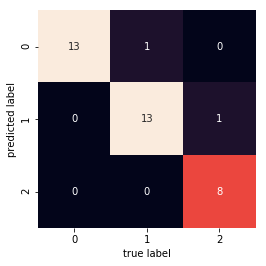

In [49]:
#3D
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_predictedGaussianResults, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

             precision    recall  f1-score   support

          0       0.93      1.00      0.96        13
          1       0.93      0.81      0.87        16
          2       0.75      0.86      0.80         7

avg / total       0.89      0.89      0.89        36



Text(91.68,0.5,'predicted label')

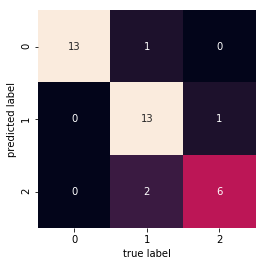

In [53]:
#3C AND 3D

###Prediction and Recall of Tree Gini

tree_giniIndex = tree_giniIndex.predict(X_test)

print(metrics.classification_report(tree_giniIndex, y_test))

mat = confusion_matrix(tree_giniIndex, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

             precision    recall  f1-score   support

          0       1.00      0.93      0.97        15
          1       0.93      0.93      0.93        14
          2       0.88      1.00      0.93         7

avg / total       0.95      0.94      0.94        36



Text(91.68,0.5,'predicted label')

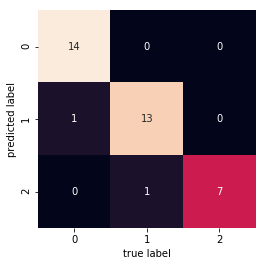

In [60]:
#3C 3D

######Prediction and Recall of Tree Entropy


tree_entropyIndex = tree_entropyIndex.predict(X_test)

print(metrics.classification_report(tree_entropyIndex, y_test))

mat = confusion_matrix(tree_entropyIndex, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

             precision    recall  f1-score   support

          0       1.00      0.93      0.97        15
          1       0.86      1.00      0.92        12
          2       1.00      0.89      0.94         9

avg / total       0.95      0.94      0.95        36



Text(91.68,0.5,'predicted label')

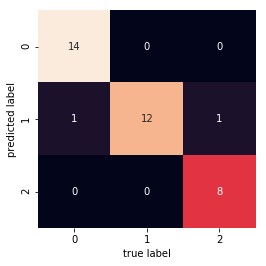

In [61]:
#3C 3D

###Prediction and Recall of Manhattan 


clf = clf.predict(X_test_norm)

print(metrics.classification_report(clf, y_test))

mat = confusion_matrix(clf, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

             precision    recall  f1-score   support

          0       1.00      0.88      0.93        16
          1       0.79      1.00      0.88        11
          2       1.00      0.89      0.94         9

avg / total       0.93      0.92      0.92        36



Text(91.68,0.5,'predicted label')

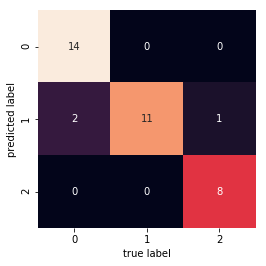

In [62]:
#3C 3D

###Prediction and Recall of Euclidean

euc = euc.predict(X_test_norm)

print(metrics.classification_report(euc, y_test))

mat = confusion_matrix(euc, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

             precision    recall  f1-score   support

          0       0.93      1.00      0.96        13
          1       1.00      0.93      0.97        15
          2       1.00      1.00      1.00         8

avg / total       0.97      0.97      0.97        36



Text(91.68,0.5,'predicted label')

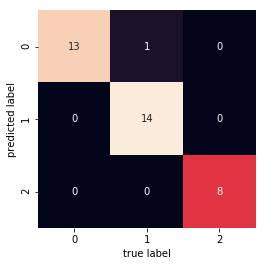

In [63]:
#3C 3D

###Prediction and Recall of SVM

svm = svm.predict(X_test_scaled)

print(metrics.classification_report(svm, y_test))
mat = confusion_matrix(svm, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')